# **Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Nickolas Winters

**Part 4** A regression model of amyloid-beta A4 inhibitors was built using the random forest algorithm.

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('amyloid_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df[df.pIC50.notna()]

## **3. Input features**
The ***Amyloid*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1184,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1185,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1186,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1183    5.987163
1184    6.004365
1185    7.000000
1186    5.806875
1187    6.744727
Name: pIC50, Length: 1187, dtype: float64

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(1187, 881)

In [6]:
Y.shape

(1187,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(1187, 173)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((949, 173), (949,))

In [11]:
X_test.shape, Y_test.shape

((238, 173), (238,))

## **5. Building a Regression Model using Random Forest**

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7067696568935196

In [13]:
Y_pred = model.predict(X_test)
Y_pred2 = pd.Series(Y_pred)
Y_test2 = Y_test.reset_index(drop=True, inplace = True)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [14]:
y_data = pd.concat([Y_test, Y_pred2], axis = 1)
y_data

,pIC50,0
0,5.091515,5.453628
1,4.767512,4.801388
2,4.000000,4.498726
3,5.136677,5.269420
4,7.285586,7.300646
...,...,...
233,7.481486,6.770756
234,4.920819,5.159576
235,3.811296,4.052716
236,6.036212,5.865109


<function matplotlib.pyplot.show(close=None, block=None)>

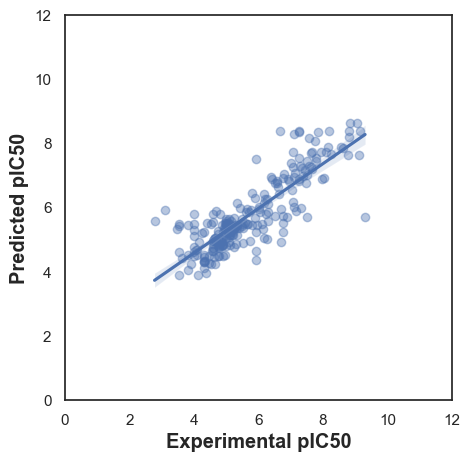

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(data=y_data, x = Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show